In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.16.1


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train_d = pd.read_csv(r'C:\Users\ACER\OneDrive\Desktop\train_data.csv')

In [14]:
test_d = pd.read_csv(r'C:\Users\ACER\OneDrive\Desktop\test_data.csv')

In [15]:
train_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.119549,24752000
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,53.991409,28604000
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.186924,20092000
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,54.976486,25582000
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.211411,20952000


In [16]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [17]:
training_set = train_d.iloc[:, 1:2].values

In [18]:
training_set.shape , train_d.shape

((1259, 1), (1259, 7))

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(training_set)

In [22]:
train_set_scaled

array([[0.03607691],
       [0.04381667],
       [0.05529791],
       ...,
       [0.37613227],
       [0.3715766 ],
       [0.37482371]])

In [30]:
x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])



x_train,y_train = np.array(x_train),np.array(y_train)
  



In [31]:
x_train

array([[0.03607691, 0.04381667, 0.05529791, ..., 0.03494283, 0.0431818 ,
        0.01167994],
       [0.04381667, 0.05529791, 0.05820576, ..., 0.0431818 , 0.01167994,
        0.01828563],
       [0.05529791, 0.05820576, 0.06219438, ..., 0.01167994, 0.01828563,
        0.02370878],
       ...,
       [0.47034709, 0.50737389, 0.5039814 , ..., 0.38999309, 0.37729544,
        0.39367636],
       [0.50737389, 0.5039814 , 0.51183261, ..., 0.37729544, 0.39367636,
        0.37613227],
       [0.5039814 , 0.51183261, 0.50359368, ..., 0.39367636, 0.37613227,
        0.3715766 ]])

In [32]:
y_train

array([0.01828563, 0.02370878, 0.01939061, ..., 0.37613227, 0.3715766 ,
       0.37482371])

In [33]:
x_train.shape

(1199, 60)

In [34]:
x_train = x_train.reshape(1199,60,1)

In [36]:
x_train.shape

(1199, 60, 1)

In [37]:
model = tf.keras.models.Sequential()

In [38]:
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True, input_shape=(60,1)))
model.add(tf.keras.layers.Dropout(0.2))

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

In [42]:
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

In [43]:
model.add(tf.keras.layers.LSTM(units=120,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [44]:
model.add(tf.keras.layers.Dense(units=1))

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [49]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - loss: 0.1066
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0071
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0048
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0053
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0053
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0035
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - loss: 0.0039
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 0.0039
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0034
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0035
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

In [50]:
test_d.shape

(313, 7)

In [51]:
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       313 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.2+ KB


In [53]:
test_real = test_d.iloc[:,1:2].values

In [54]:
test_real

array([[ 99.73999786],
       [106.79000092],
       [103.51000214],
       [102.68499756],
       [103.62999725],
       [102.69000244],
       [100.54000092],
       [ 95.73999786],
       [ 95.01000214],
       [ 94.66000366],
       [ 94.73999786],
       [ 95.54000092],
       [ 95.06999969],
       [ 93.23999786],
       [ 91.93399811],
       [ 92.12999725],
       [ 89.62999725],
       [ 90.08999634],
       [ 89.54000092],
       [ 90.16000366],
       [ 89.86000061],
       [ 92.73999786],
       [ 94.36000061],
       [ 95.41999817],
       [ 94.40499878],
       [ 94.48999786],
       [ 92.5       ],
       [ 90.56500244],
       [ 93.06999969],
       [ 93.54000092],
       [ 96.56999969],
       [100.83999634],
       [101.05999756],
       [101.98000336],
       [105.13999939],
       [105.88999939],
       [105.73999786],
       [105.31999969],
       [103.        ],
       [102.72000122],
       [101.44000244],
       [101.70999908],
       [102.66999817],
       [104

In [55]:
test_real.shape

(313, 1)

In [65]:
import datetime as dt

Enter the date for prediction (YYYY-MM-DD):  2025-01-01


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted stock price for 2025-01-01: 147.55323791503906


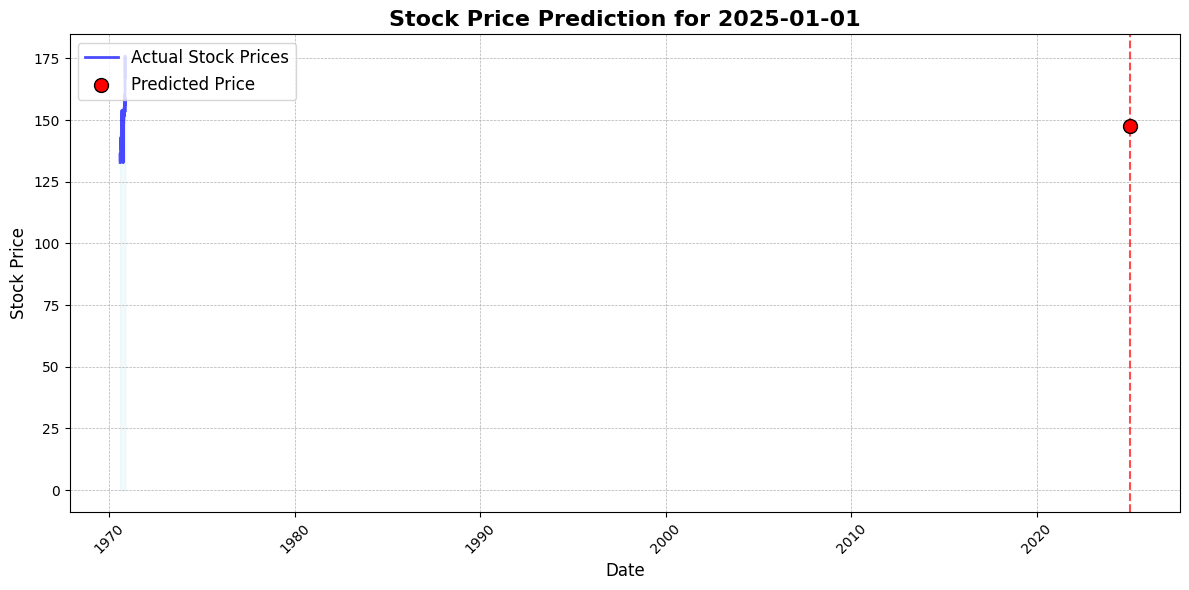

In [68]:
data_total = pd.concat([train_d['Open'], test_d['Open']], axis=0)

# Get user input for the prediction date
user_date = input("Enter the date for prediction (YYYY-MM-DD): ")
user_date = dt.datetime.strptime(user_date, '%Y-%m-%d')

# We will now use the last 60 days of available data to predict the stock price for the user_date
last_60_days = data_total[-60:].values.reshape(-1, 1)  # Get the last 60 days
last_60_days_scaled = sc.transform(last_60_days)  # Scale the data

# Prepare the input for the model
x_test = []
x_test.append(last_60_days_scaled)

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict the stock price using your model for the future date
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

# Display the predicted price
print(f"Predicted stock price for {user_date.strftime('%Y-%m-%d')}: {predicted_price[0][0]}")

# Plotting the actual stock data along with the predicted price
plt.figure(figsize=(12, 6))
plt.plot(data_total.index[-100:], data_total.values[-100:], color='blue', linewidth=2, label='Actual Stock Prices', alpha=0.7)
plt.scatter(user_date, predicted_price, color='red', s=100, label='Predicted Price', zorder=5, edgecolor='black')

# Adding more stylistic elements
plt.title(f'Stock Price Prediction for {user_date.strftime("%Y-%m-%d")}', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=12)

# Highlighting the predicted point
plt.axvline(x=user_date, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Prediction Date')
plt.fill_between(data_total.index[-100:], data_total.values[-100:], color='skyblue', alpha=0.1)

# Show the graph
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'test_d' contains your test data and 'model' has already been trained

# Make predictions on the test set (replace with actual test set size if necessary)
test_inputs = data_total[len(data_total) - len(test_d) - 60:].values.reshape(-1, 1)
test_inputs = sc.transform(test_inputs)  # Scale the inputs as done during training

x_test = []
for i in range(60, len(test_inputs)):
    x_test.append(test_inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predicting stock prices for the test data
predicted_stock_prices = model.predict(x_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

# Getting actual stock prices from the test set
actual_stock_prices = test_d['Open'].values

# Calculating accuracy metrics
mse = mean_squared_error(actual_stock_prices, predicted_stock_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_stock_prices, predicted_stock_prices)
r2 = r2_score(actual_stock_prices, predicted_stock_prices)

# Displaying the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Mean Squared Error (MSE): 77.89114912405621
Root Mean Squared Error (RMSE): 8.825596247509639
Mean Absolute Error (MAE): 7.704134273833741
R² Score: 0.757883660936929
